In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Setup
plt.style.use('seaborn-v0_8-whitegrid')
# Get the directory of this notebook file and construct absolute path to results
notebook_dir = Path.cwd() / 'notebooks'
project_root = notebook_dir.parent
RESULTS_DIR = project_root / 'results'

# Partners where Trust-based agent excels
WINNING_PARTNERS = ['SingleCycle', 'GradualDeterioration', 'ExpectationViolation']

## Partners WON
- **SingleCycle**: Cooperates for 30% of rounds, then permanently defects
- **GradualDeterioration**: Linearly decreasing cooperation probability
- **ExpectationViolation**: Does opposite of agent's prediction

## 1. Monte Carlo Comparison Tables

### 1.1 Total Payoff Comparison

In [2]:
# Load total payoff comparison
payoff_df = pd.read_csv(RESULTS_DIR / 'total_payoff_comparison.csv')

# Filter for winning partners
winning_payoff = payoff_df[payoff_df['Partner Strategy'].isin(WINNING_PARTNERS)].copy()
winning_payoff = winning_payoff.set_index('Partner Strategy').loc[WINNING_PARTNERS].reset_index()

print("="*80)
print("MONTE CARLO PAYOFF COMPARISON: Trust-Based Agent Wins")
print("="*80)
print(f"Number of Monte Carlo runs: 300")
print(f"Number of rounds per simulation: 100")
print("="*80)
print()
display(winning_payoff.style.format({
    'Trust-Based Mean': '{:.1f}',
    'Trust-Based Std': '{:.1f}',
    'Bayesian Mean': '{:.1f}',
    'Bayesian Std': '{:.1f}',
}).set_caption('Total Payoff Comparison (Trust-Based Agent Wins)'))

MONTE CARLO PAYOFF COMPARISON: Trust-Based Agent Wins
Number of Monte Carlo runs: 300
Number of rounds per simulation: 100



,Partner Strategy,Trust-Based Mean,Trust-Based Std,Bayesian Mean,Bayesian Std,Difference (Trust - Bayes),Sig,% Trust Better
0,SingleCycle,233.9,5.0,209.0,7.5,24.900000,***,100%
1,GradualDeterioration,241.7,10.2,224.2,10.7,17.500000,***,87%
2,ExpectationViolation,265.1,12.3,261.7,15.8,3.400000,**,52%


### 1.2 Summary Statistics (Including Cooperation Rates)

### 1.2.1. Mutual Cooperation Rate Comparison

In [3]:
# Load mutual cooperation comparison
mutual_coop_df = pd.read_csv(RESULTS_DIR / 'mutual_cooperation_comparison.csv')

# Filter for winning partners
winning_mutual_coop = mutual_coop_df[mutual_coop_df['Partner Strategy'].isin(WINNING_PARTNERS)].copy()
winning_mutual_coop = winning_mutual_coop.set_index('Partner Strategy').loc[WINNING_PARTNERS].reset_index()

print("="*80)
print("MUTUAL COOPERATION RATE COMPARISON: Trust-Based Agent Wins")
print("="*80)
print("KPI: Mutual Cooperation Rate (both agents cooperate) - HIGHER IS BETTER")
print("="*80)
print()
display(winning_mutual_coop.style.set_caption('Mutual Cooperation Rate Comparison (Trust-Based Agent Wins)'))

MUTUAL COOPERATION RATE COMPARISON: Trust-Based Agent Wins
KPI: Mutual Cooperation Rate (both agents cooperate) - HIGHER IS BETTER



,Partner Strategy,Trust-Based Mean,Trust-Based Std,Bayesian Mean,Bayesian Std,Difference (Trust - Bayes),Sig,% Trust Better
0,SingleCycle,21.6%,2.3%,23.7%,2.2%,-2.1%,***,20%
1,GradualDeterioration,22.8%,4.8%,28.5%,5.8%,-5.7%,***,20%
2,ExpectationViolation,29.9%,3.0%,29.3%,3.9%,+0.6%,*,48%


### 1.2.2 Betrayal Rate Comparison

In [4]:
# Load betrayal rate comparison
betrayal_df = pd.read_csv(RESULTS_DIR / 'failed_collaboration_comparison.csv')

# Filter for winning partners
winning_betrayal = betrayal_df[betrayal_df['Partner Strategy'].isin(WINNING_PARTNERS)].copy()
winning_betrayal = winning_betrayal.set_index('Partner Strategy').loc[WINNING_PARTNERS].reset_index()

print("="*80)
print("BETRAYAL RATE COMPARISON: Trust-Based Agent Wins")
print("="*80)
print("KPI: Betrayal Rate (agent cooperates, partner defects) - LOWER IS BETTER")
print("="*80)
print()
display(winning_betrayal.style.set_caption('Betrayal Rate Comparison (Trust-Based Agent Wins)'))

BETRAYAL RATE COMPARISON: Trust-Based Agent Wins
KPI: Betrayal Rate (agent cooperates, partner defects) - LOWER IS BETTER



,Partner Strategy,Trust-Based Mean,Trust-Based Std,Bayesian Mean,Bayesian Std,Difference (Trust - Bayes),Sig,% Trust Better
0,SingleCycle,8.9%,2.2%,22.4%,3.7%,-13.5%,***,100%
1,GradualDeterioration,12.7%,3.0%,24.4%,3.6%,-11.6%,***,99%
2,ExpectationViolation,14.8%,3.0%,15.9%,3.7%,-1.1%,***,51%


## 2. Decision-Making Trends in the Last Round

This section shows the final round decision-making behavior of both agents, including:
- **Mean E[p]**: Expected cooperation probability at the last round
- **Cooperation Rate**: Percentage of Monte Carlo runs where the agent cooperated in the final round
- **Choice**: Modal (most common) decision in the final round

In [5]:
# Load final decision data
focal_final = pd.read_csv(RESULTS_DIR / 'focal_final_decisions.csv')
bayesian_final = pd.read_csv(RESULTS_DIR / 'bayesian_final_decisions.csv')

# Filter for winning partners
focal_winning = focal_final[focal_final['Partner'].isin(WINNING_PARTNERS)].copy()
focal_winning = focal_winning.set_index('Partner').loc[WINNING_PARTNERS].reset_index()

bayesian_winning = bayesian_final[bayesian_final['Partner'].isin(WINNING_PARTNERS)].copy()
bayesian_winning = bayesian_winning.set_index('Partner').loc[WINNING_PARTNERS].reset_index()
# Create combined comparison table
comparison_df = pd.DataFrame({
    'Partner': WINNING_PARTNERS,
    'Trust E[p]': focal_winning['Mean E[p]'].values,
    'Trust Coop Rate': focal_winning['Cooperation Rate'].values,
    'Trust Choice': focal_winning['Choice'].values,
    'Bayes E[p]': bayesian_winning['Mean E[p]'].values,
    'Bayes Coop Rate': bayesian_winning['Cooperation Rate'].values,
    'Bayes Choice': bayesian_winning['Choice'].values,
})

print("\nSIDE-BY-SIDE COMPARISON: Final Round Decision Trends")
print("="*80)
display(comparison_df.style.set_caption('Final Round Decision Comparison: Trust vs Bayesian'))


SIDE-BY-SIDE COMPARISON: Final Round Decision Trends


,Partner,Trust E[p],Trust Coop Rate,Trust Choice,Bayes E[p],Bayes Coop Rate,Bayes Choice
0,SingleCycle,0.095000,3.0%,Defect,0.307000,10.7%,Defect
1,GradualDeterioration,0.121000,3.0%,Defect,0.449000,20.7%,Defect
2,ExpectationViolation,0.613000,44.7%,Defect,0.640000,42.3%,Defect


## 4. Detailed Trajectory Visualizations

The following visualizations show side-by-side comparisons of Trust-Based vs Bayesian agent behavior for each partner where Trust-Based excels. Each plot shows:
- **Row 1**: Expected cooperation probability (E[p] vs Posterior Mean)
- **Row 2**: Confidence measures (Trust Level vs Concentration α+β)
- **Row 3**: Partner's behavior (cooperation/defection choices)

In [6]:
# Load simulation data for the three winning partners
import matplotlib.gridspec as gridspec

# Load data for SingleCycle
df_single_trust = pd.read_csv(RESULTS_DIR / 'SingleCycle_agent1.csv')
df_single_bayes = pd.read_csv(RESULTS_DIR / 'SingleCycle_agent2.csv')

# Load data for GradualDeterioration
df_gradual_trust = pd.read_csv(RESULTS_DIR / 'GradualDeterioration_agent1.csv')
df_gradual_bayes = pd.read_csv(RESULTS_DIR / 'GradualDeterioration_agent2.csv')

# Load data for ExpectationViolation
df_expect_trust = pd.read_csv(RESULTS_DIR / 'ExpectationViolation_agent1.csv')
df_expect_bayes = pd.read_csv(RESULTS_DIR / 'ExpectationViolation_agent2.csv')

# Get a single representative run (run_id=0) for visualization
df_single_trust_run0 = df_single_trust[df_single_trust['run_id'] == 0].copy()
df_single_bayes_run0 = df_single_bayes[df_single_bayes['run_id'] == 0].copy()

df_gradual_trust_run0 = df_gradual_trust[df_gradual_trust['run_id'] == 0].copy()
df_gradual_bayes_run0 = df_gradual_bayes[df_gradual_bayes['run_id'] == 0].copy()

df_expect_trust_run0 = df_expect_trust[df_expect_trust['run_id'] == 0].copy()
df_expect_bayes_run0 = df_expect_bayes[df_expect_bayes['run_id'] == 0].copy()

# Compute concentration for Bayesian agent
df_single_bayes_run0['Concentration'] = df_single_bayes_run0['alpha'] + df_single_bayes_run0['beta']
df_gradual_bayes_run0['Concentration'] = df_gradual_bayes_run0['alpha'] + df_gradual_bayes_run0['beta']
df_expect_bayes_run0['Concentration'] = df_expect_bayes_run0['alpha'] + df_expect_bayes_run0['beta']

num_rounds = len(df_single_trust_run0)
print(f"Loaded data: {num_rounds} rounds per simulation")
print(f"SingleCycle runs: {df_single_trust['run_id'].nunique()}")
print(f"GradualDeterioration runs: {df_gradual_trust['run_id'].nunique()}")
print(f"ExpectationViolation runs: {df_expect_trust['run_id'].nunique()}")

Loaded data: 100 rounds per simulation
SingleCycle runs: 300
GradualDeterioration runs: 300
ExpectationViolation runs: 300


### 4.1 SingleCycle Partner Comparison (+24.9 payoff advantage, 100% win rate)

The SingleCycle partner cooperates for the first 30% of rounds, then defects permanently. This tests how quickly each agent adapts to a sudden, permanent strategy change.

/tmp/ipykernel_42960/440776359.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/mzarreh/projects2/trust-bayesian-agent-comparison/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


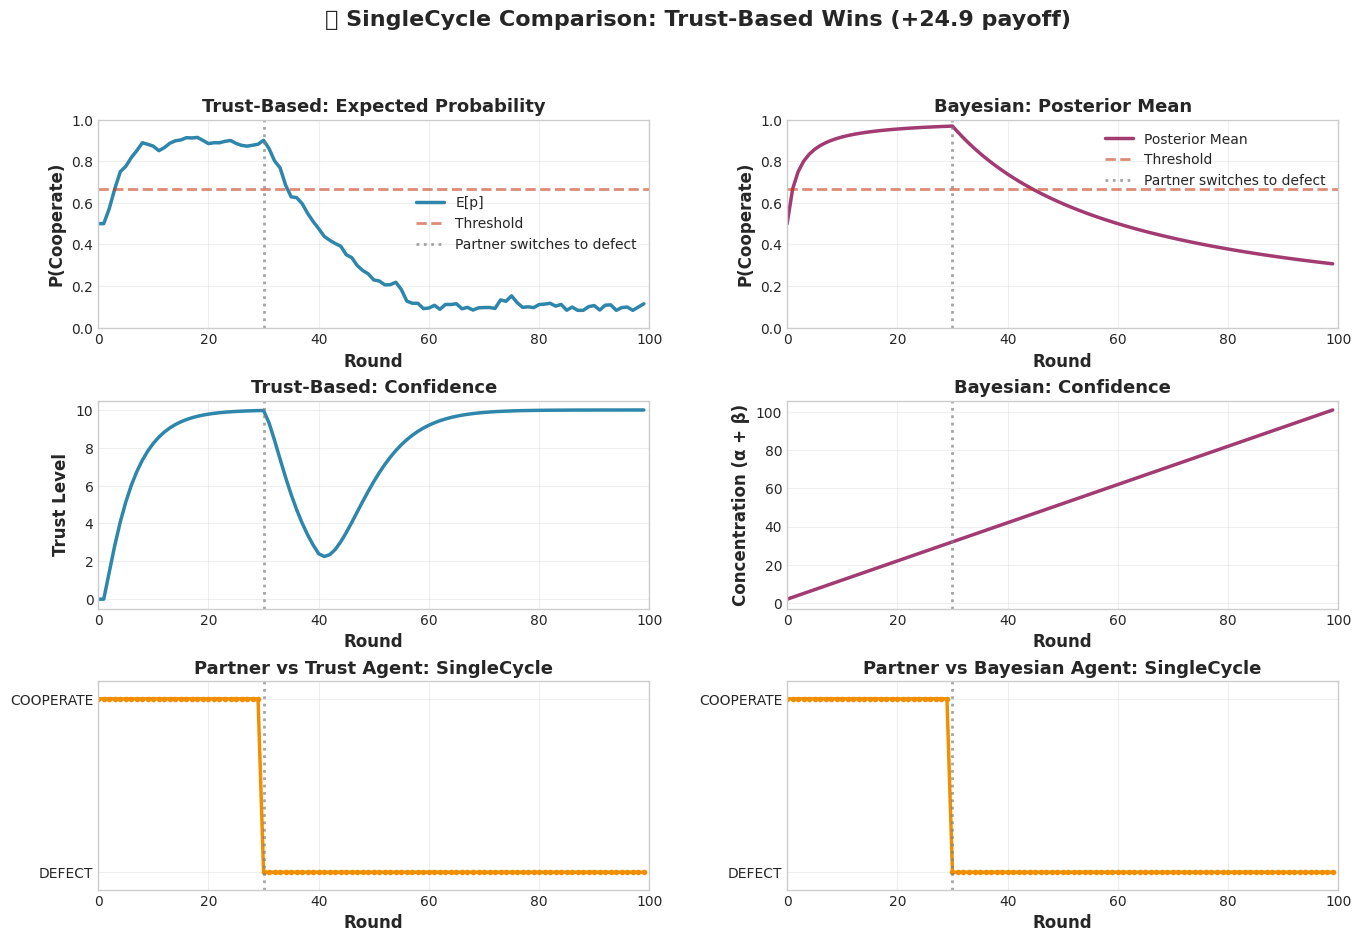

✅ SingleCycle comparison plot completed!


In [7]:
# ============================================================================
# STATIC COMPARISON PLOT: SINGLE CYCLE
# ============================================================================

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.25)

ax_prob_trust = fig.add_subplot(gs[0, 0])
ax_prob_bayes = fig.add_subplot(gs[0, 1])
ax_conf_trust = fig.add_subplot(gs[1, 0])
ax_conf_bayes = fig.add_subplot(gs[1, 1])
ax_partner_trust = fig.add_subplot(gs[2, 0])
ax_partner_bayes = fig.add_subplot(gs[2, 1])

colors = {'trust': '#2E86AB', 'bayesian': '#A23B72', 'partner': '#F18F01', 'threshold': '#C73E1D'}

# Plot probability/posterior mean for both agents
ax_prob_trust.plot(df_single_trust_run0['round'], df_single_trust_run0['agent_belief'], 
                   color=colors['trust'], linewidth=2.5, label='E[p]')
ax_prob_trust.axhline(2/3, color=colors['threshold'], linestyle='--', alpha=0.6, linewidth=2, label='Threshold')
ax_prob_trust.axvline(30, color='gray', linestyle=':', alpha=0.7, linewidth=2, label='Partner switches to defect')
ax_prob_trust.set_xlim(0, num_rounds)
ax_prob_trust.set_ylim(0, 1)
ax_prob_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_prob_trust.set_ylabel('P(Cooperate)', fontsize=12, fontweight='bold')
ax_prob_trust.set_title('Trust-Based: Expected Probability', fontsize=13, fontweight='bold')
ax_prob_trust.grid(alpha=0.3)
ax_prob_trust.legend()

ax_prob_bayes.plot(df_single_bayes_run0['round'], df_single_bayes_run0['agent_belief'], 
                   color=colors['bayesian'], linewidth=2.5, label='Posterior Mean')
ax_prob_bayes.axhline(2/3, color=colors['threshold'], linestyle='--', alpha=0.6, linewidth=2, label='Threshold')
ax_prob_bayes.axvline(30, color='gray', linestyle=':', alpha=0.7, linewidth=2, label='Partner switches to defect')
ax_prob_bayes.set_xlim(0, num_rounds)
ax_prob_bayes.set_ylim(0, 1)
ax_prob_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_prob_bayes.set_ylabel('P(Cooperate)', fontsize=12, fontweight='bold')
ax_prob_bayes.set_title('Bayesian: Posterior Mean', fontsize=13, fontweight='bold')
ax_prob_bayes.grid(alpha=0.3)
ax_prob_bayes.legend()

# Plot confidence measures for both agents
ax_conf_trust.plot(df_single_trust_run0['round'], df_single_trust_run0['trust_level'], 
                   color=colors['trust'], linewidth=2.5)
ax_conf_trust.axvline(30, color='gray', linestyle=':', alpha=0.7, linewidth=2)
ax_conf_trust.set_xlim(0, num_rounds)
ax_conf_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_conf_trust.set_ylabel('Trust Level', fontsize=12, fontweight='bold')
ax_conf_trust.set_title('Trust-Based: Confidence', fontsize=13, fontweight='bold')
ax_conf_trust.grid(alpha=0.3)

ax_conf_bayes.plot(df_single_bayes_run0['round'], df_single_bayes_run0['Concentration'], 
                   color=colors['bayesian'], linewidth=2.5)
ax_conf_bayes.axvline(30, color='gray', linestyle=':', alpha=0.7, linewidth=2)
ax_conf_bayes.set_xlim(0, num_rounds)
ax_conf_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_conf_bayes.set_ylabel('Concentration (α + β)', fontsize=12, fontweight='bold')
ax_conf_bayes.set_title('Bayesian: Confidence', fontsize=13, fontweight='bold')
ax_conf_bayes.grid(alpha=0.3)

# Plot partner behavior for both interactions
ax_partner_trust.plot(df_single_trust_run0['round'], df_single_trust_run0['partner_action'], 
                      color=colors['partner'], linewidth=2.5, marker='o', markersize=3)
ax_partner_trust.axvline(30, color='gray', linestyle=':', alpha=0.7, linewidth=2)
ax_partner_trust.set_xlim(0, num_rounds)
ax_partner_trust.set_ylim(-0.1, 1.1)
ax_partner_trust.set_yticks([0, 1])
ax_partner_trust.set_yticklabels(['DEFECT', 'COOPERATE'])
ax_partner_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_partner_trust.set_title('Partner vs Trust Agent: SingleCycle', fontsize=13, fontweight='bold')
ax_partner_trust.grid(alpha=0.3)

ax_partner_bayes.plot(df_single_bayes_run0['round'], df_single_bayes_run0['partner_action'], 
                      color=colors['partner'], linewidth=2.5, marker='o', markersize=3)
ax_partner_bayes.axvline(30, color='gray', linestyle=':', alpha=0.7, linewidth=2)
ax_partner_bayes.set_xlim(0, num_rounds)
ax_partner_bayes.set_ylim(-0.1, 1.1)
ax_partner_bayes.set_yticks([0, 1])
ax_partner_bayes.set_yticklabels(['DEFECT', 'COOPERATE'])
ax_partner_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_partner_bayes.set_title('Partner vs Bayesian Agent: SingleCycle', fontsize=13, fontweight='bold')
ax_partner_bayes.grid(alpha=0.3)

fig.suptitle('🎯 SingleCycle Comparison: Trust-Based Wins (+24.9 payoff)', fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()
plt.show()

print("✅ SingleCycle comparison plot completed!")

### 4.2 GradualDeterioration Partner Comparison (+17.5 payoff advantage, 87% win rate)

The GradualDeterioration partner starts with 100% cooperation and linearly decreases to 20% by the end. This tests how well each agent tracks a gradually worsening environment.

/tmp/ipykernel_42960/3709593510.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/mzarreh/projects2/trust-bayesian-agent-comparison/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


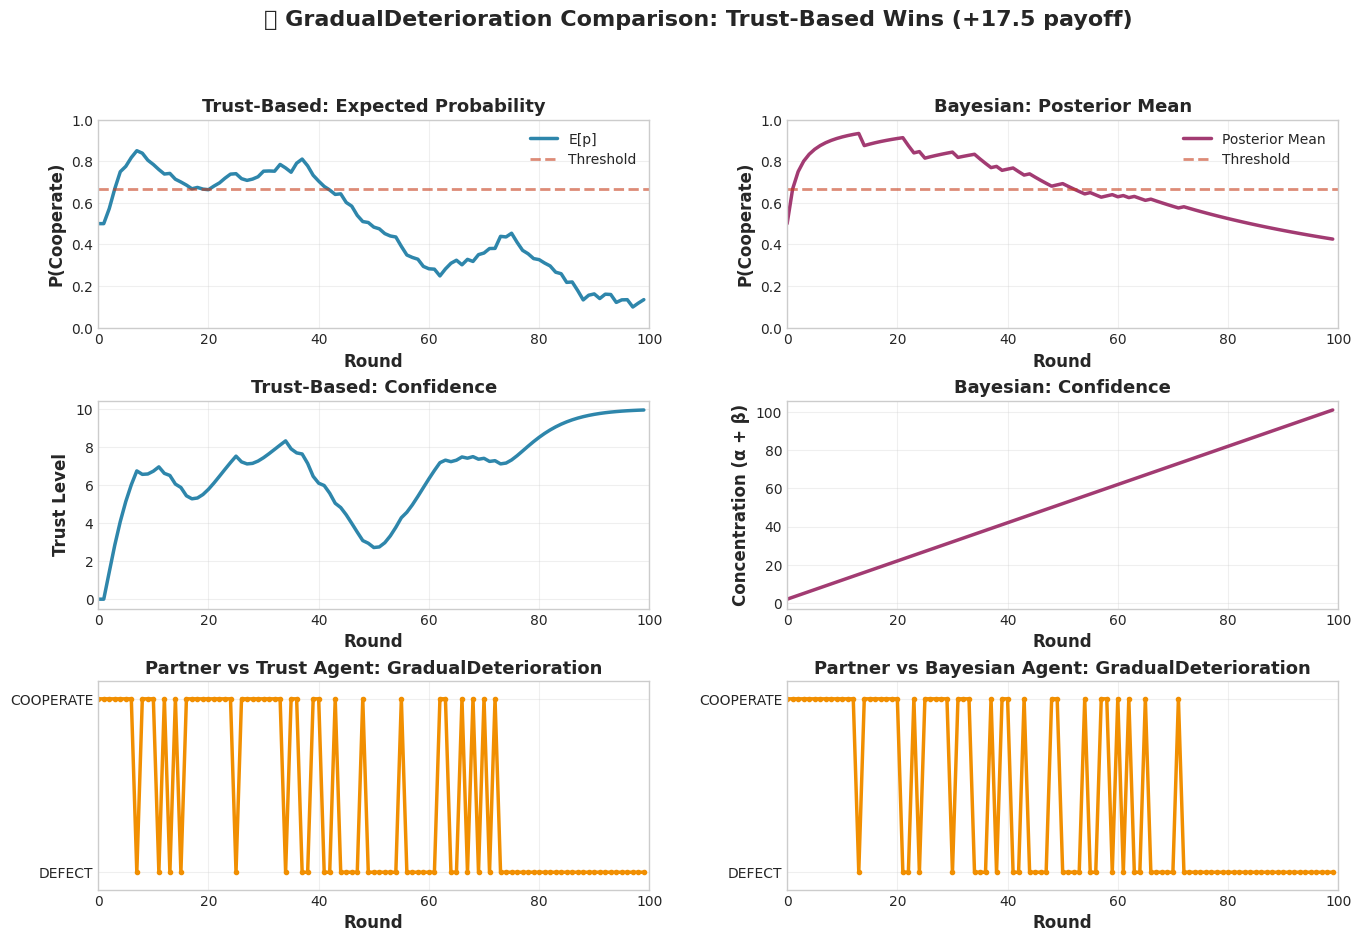

✅ GradualDeterioration comparison plot completed!


In [8]:
# ============================================================================
# STATIC COMPARISON PLOT: GRADUAL DETERIORATION
# ============================================================================

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.25)

ax_prob_trust = fig.add_subplot(gs[0, 0])
ax_prob_bayes = fig.add_subplot(gs[0, 1])
ax_conf_trust = fig.add_subplot(gs[1, 0])
ax_conf_bayes = fig.add_subplot(gs[1, 1])
ax_partner_trust = fig.add_subplot(gs[2, 0])
ax_partner_bayes = fig.add_subplot(gs[2, 1])

colors = {'trust': '#2E86AB', 'bayesian': '#A23B72', 'partner': '#F18F01', 'threshold': '#C73E1D'}

num_rounds_gradual = len(df_gradual_trust_run0)

# Plot probability/posterior mean for both agents
ax_prob_trust.plot(df_gradual_trust_run0['round'], df_gradual_trust_run0['agent_belief'], 
                   color=colors['trust'], linewidth=2.5, label='E[p]')
ax_prob_trust.axhline(2/3, color=colors['threshold'], linestyle='--', alpha=0.6, linewidth=2, label='Threshold')
ax_prob_trust.set_xlim(0, num_rounds_gradual)
ax_prob_trust.set_ylim(0, 1)
ax_prob_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_prob_trust.set_ylabel('P(Cooperate)', fontsize=12, fontweight='bold')
ax_prob_trust.set_title('Trust-Based: Expected Probability', fontsize=13, fontweight='bold')
ax_prob_trust.grid(alpha=0.3)
ax_prob_trust.legend()

ax_prob_bayes.plot(df_gradual_bayes_run0['round'], df_gradual_bayes_run0['agent_belief'], 
                   color=colors['bayesian'], linewidth=2.5, label='Posterior Mean')
ax_prob_bayes.axhline(2/3, color=colors['threshold'], linestyle='--', alpha=0.6, linewidth=2, label='Threshold')
ax_prob_bayes.set_xlim(0, num_rounds_gradual)
ax_prob_bayes.set_ylim(0, 1)
ax_prob_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_prob_bayes.set_ylabel('P(Cooperate)', fontsize=12, fontweight='bold')
ax_prob_bayes.set_title('Bayesian: Posterior Mean', fontsize=13, fontweight='bold')
ax_prob_bayes.grid(alpha=0.3)
ax_prob_bayes.legend()

# Plot confidence measures for both agents
ax_conf_trust.plot(df_gradual_trust_run0['round'], df_gradual_trust_run0['trust_level'], 
                   color=colors['trust'], linewidth=2.5)
ax_conf_trust.set_xlim(0, num_rounds_gradual)
ax_conf_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_conf_trust.set_ylabel('Trust Level', fontsize=12, fontweight='bold')
ax_conf_trust.set_title('Trust-Based: Confidence', fontsize=13, fontweight='bold')
ax_conf_trust.grid(alpha=0.3)

ax_conf_bayes.plot(df_gradual_bayes_run0['round'], df_gradual_bayes_run0['Concentration'], 
                   color=colors['bayesian'], linewidth=2.5)
ax_conf_bayes.set_xlim(0, num_rounds_gradual)
ax_conf_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_conf_bayes.set_ylabel('Concentration (α + β)', fontsize=12, fontweight='bold')
ax_conf_bayes.set_title('Bayesian: Confidence', fontsize=13, fontweight='bold')
ax_conf_bayes.grid(alpha=0.3)

# Plot partner behavior for both interactions
ax_partner_trust.plot(df_gradual_trust_run0['round'], df_gradual_trust_run0['partner_action'], 
                      color=colors['partner'], linewidth=2.5, marker='o', markersize=3)
ax_partner_trust.set_xlim(0, num_rounds_gradual)
ax_partner_trust.set_ylim(-0.1, 1.1)
ax_partner_trust.set_yticks([0, 1])
ax_partner_trust.set_yticklabels(['DEFECT', 'COOPERATE'])
ax_partner_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_partner_trust.set_title('Partner vs Trust Agent: GradualDeterioration', fontsize=13, fontweight='bold')
ax_partner_trust.grid(alpha=0.3)

ax_partner_bayes.plot(df_gradual_bayes_run0['round'], df_gradual_bayes_run0['partner_action'], 
                      color=colors['partner'], linewidth=2.5, marker='o', markersize=3)
ax_partner_bayes.set_xlim(0, num_rounds_gradual)
ax_partner_bayes.set_ylim(-0.1, 1.1)
ax_partner_bayes.set_yticks([0, 1])
ax_partner_bayes.set_yticklabels(['DEFECT', 'COOPERATE'])
ax_partner_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_partner_bayes.set_title('Partner vs Bayesian Agent: GradualDeterioration', fontsize=13, fontweight='bold')
ax_partner_bayes.grid(alpha=0.3)

fig.suptitle('🎯 GradualDeterioration Comparison: Trust-Based Wins (+17.5 payoff)', fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()
plt.show()

print("✅ GradualDeterioration comparison plot completed!")

### 4.3 ExpectationViolation Partner Comparison (+3.4 payoff advantage, 52% win rate)

The ExpectationViolation partner always does the opposite of what it predicts the agent will do, maximizing prediction errors. This tests resilience to adversarial behavior.

/tmp/ipykernel_42960/3674667409.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/mzarreh/projects2/trust-bayesian-agent-comparison/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


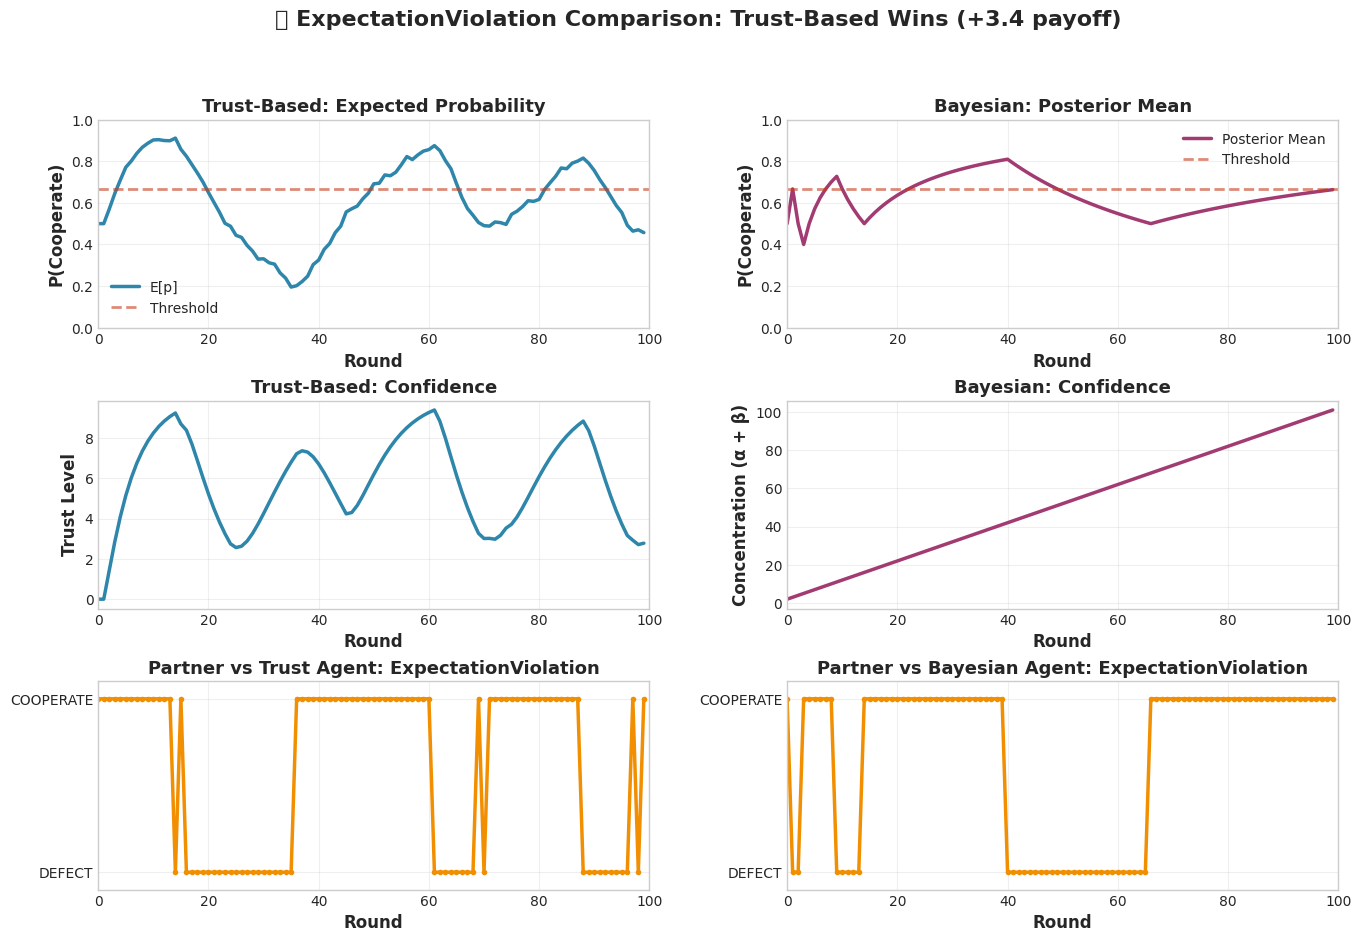

✅ ExpectationViolation comparison plot completed!


In [9]:
# ============================================================================
# STATIC COMPARISON PLOT: EXPECTATION VIOLATION
# ============================================================================

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.25)

ax_prob_trust = fig.add_subplot(gs[0, 0])
ax_prob_bayes = fig.add_subplot(gs[0, 1])
ax_conf_trust = fig.add_subplot(gs[1, 0])
ax_conf_bayes = fig.add_subplot(gs[1, 1])
ax_partner_trust = fig.add_subplot(gs[2, 0])
ax_partner_bayes = fig.add_subplot(gs[2, 1])

colors = {'trust': '#2E86AB', 'bayesian': '#A23B72', 'partner': '#F18F01', 'threshold': '#C73E1D'}

num_rounds_expect = len(df_expect_trust_run0)

# Plot probability/posterior mean for both agents
ax_prob_trust.plot(df_expect_trust_run0['round'], df_expect_trust_run0['agent_belief'], 
                   color=colors['trust'], linewidth=2.5, label='E[p]')
ax_prob_trust.axhline(2/3, color=colors['threshold'], linestyle='--', alpha=0.6, linewidth=2, label='Threshold')
ax_prob_trust.set_xlim(0, num_rounds_expect)
ax_prob_trust.set_ylim(0, 1)
ax_prob_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_prob_trust.set_ylabel('P(Cooperate)', fontsize=12, fontweight='bold')
ax_prob_trust.set_title('Trust-Based: Expected Probability', fontsize=13, fontweight='bold')
ax_prob_trust.grid(alpha=0.3)
ax_prob_trust.legend()

ax_prob_bayes.plot(df_expect_bayes_run0['round'], df_expect_bayes_run0['agent_belief'], 
                   color=colors['bayesian'], linewidth=2.5, label='Posterior Mean')
ax_prob_bayes.axhline(2/3, color=colors['threshold'], linestyle='--', alpha=0.6, linewidth=2, label='Threshold')
ax_prob_bayes.set_xlim(0, num_rounds_expect)
ax_prob_bayes.set_ylim(0, 1)
ax_prob_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_prob_bayes.set_ylabel('P(Cooperate)', fontsize=12, fontweight='bold')
ax_prob_bayes.set_title('Bayesian: Posterior Mean', fontsize=13, fontweight='bold')
ax_prob_bayes.grid(alpha=0.3)
ax_prob_bayes.legend()

# Plot confidence measures for both agents
ax_conf_trust.plot(df_expect_trust_run0['round'], df_expect_trust_run0['trust_level'], 
                   color=colors['trust'], linewidth=2.5)
ax_conf_trust.set_xlim(0, num_rounds_expect)
ax_conf_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_conf_trust.set_ylabel('Trust Level', fontsize=12, fontweight='bold')
ax_conf_trust.set_title('Trust-Based: Confidence', fontsize=13, fontweight='bold')
ax_conf_trust.grid(alpha=0.3)

ax_conf_bayes.plot(df_expect_bayes_run0['round'], df_expect_bayes_run0['Concentration'], 
                   color=colors['bayesian'], linewidth=2.5)
ax_conf_bayes.set_xlim(0, num_rounds_expect)
ax_conf_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_conf_bayes.set_ylabel('Concentration (α + β)', fontsize=12, fontweight='bold')
ax_conf_bayes.set_title('Bayesian: Confidence', fontsize=13, fontweight='bold')
ax_conf_bayes.grid(alpha=0.3)

# Plot partner behavior for both interactions
ax_partner_trust.plot(df_expect_trust_run0['round'], df_expect_trust_run0['partner_action'], 
                      color=colors['partner'], linewidth=2.5, marker='o', markersize=3)
ax_partner_trust.set_xlim(0, num_rounds_expect)
ax_partner_trust.set_ylim(-0.1, 1.1)
ax_partner_trust.set_yticks([0, 1])
ax_partner_trust.set_yticklabels(['DEFECT', 'COOPERATE'])
ax_partner_trust.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_partner_trust.set_title('Partner vs Trust Agent: ExpectationViolation', fontsize=13, fontweight='bold')
ax_partner_trust.grid(alpha=0.3)

ax_partner_bayes.plot(df_expect_bayes_run0['round'], df_expect_bayes_run0['partner_action'], 
                      color=colors['partner'], linewidth=2.5, marker='o', markersize=3)
ax_partner_bayes.set_xlim(0, num_rounds_expect)
ax_partner_bayes.set_ylim(-0.1, 1.1)
ax_partner_bayes.set_yticks([0, 1])
ax_partner_bayes.set_yticklabels(['DEFECT', 'COOPERATE'])
ax_partner_bayes.set_xlabel('Round', fontsize=12, fontweight='bold')
ax_partner_bayes.set_title('Partner vs Bayesian Agent: ExpectationViolation', fontsize=13, fontweight='bold')
ax_partner_bayes.grid(alpha=0.3)

fig.suptitle('🎯 ExpectationViolation Comparison: Trust-Based Wins (+3.4 payoff)', fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()
plt.show()

print("✅ ExpectationViolation comparison plot completed!")

## 3. Key Insights

### Why Trust-Based Agent Excels Against These Partners

1. **SingleCycle** (+24.9 advantage, 100% win rate)
   - Partner cooperates for first 30% of rounds, then defects permanently
   - Trust-based agent's asymmetric penalties quickly detect the betrayal
   - Lower final E[p] (0.095 vs 0.307) shows faster adaptation to defection
   - Lower cooperation rate (3.0% vs 10.7%) at end means fewer wasted cooperations

2. **GradualDeterioration** (+17.5 advantage, 87% win rate)
   - Partner's cooperation probability linearly decreases over time
   - Trust-based agent's signal/trust dual-state captures the trend
   - Lower final E[p] (0.121 vs 0.449) and cooperation rate (3.0% vs 20.7%)
   - Bayesian's simple Beta-Bernoulli struggles with non-stationarity

3. **ExpectationViolation** (+3.4 advantage, 52% win rate)
   - Partner always does opposite of its prediction
   - Similar final E[p] but Trust-based slightly lower variance
   - Trust-based's robustness to adversarial patterns helps marginally

### Common Pattern
The Trust-based agent excels when facing **non-stationary environments** where:
- Partner behavior changes over time (SingleCycle, GradualDeterioration)
- Partner actively adapts to agent's behavior (ExpectationViolation)

The key mechanism is the **asymmetric trust penalty**: betrayal (expected cooperation, got defection) is penalized more heavily than surprise (expected defection, got cooperation), making the Trust-based agent more cautious and adaptive in adversarial or deteriorating environments.